In [1]:
from qiskit_algorithms.utils import algorithm_globals
from sklearn import datasets
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.model_selection import train_test_split
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, ZFeatureMap, TwoLocal
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import BlueprintCircuit
from qiskit.circuit import Parameter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
algorithm_globals.random_seed = 13


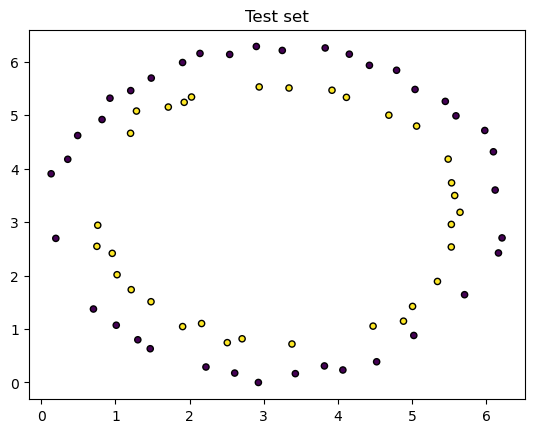

In [2]:
X, y = make_circles(n_samples=100, factor=0.8, noise=0.025, random_state=42)
X = MinMaxScaler(feature_range=(0, 2*np.pi)).fit_transform(X) #seems to have better results if compatible with the rotation encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13) #if I take more training values it crashes on my pc

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Test set')
plt.show()

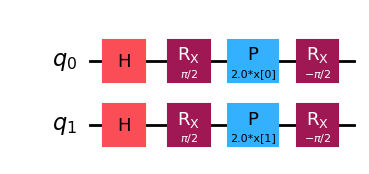

In [3]:
feature_map = PauliFeatureMap(feature_dimension=2, reps=1, paulis=['Y'])
#feature_map = ZZFeatureMap(feature_dimension=2, reps=1)
feature_map.decompose().draw('mpl')

Accuracy:  0.5


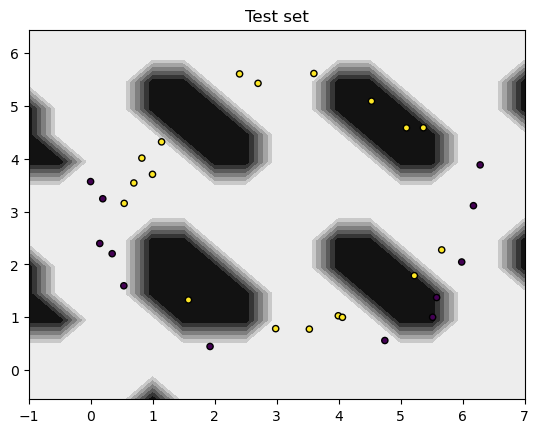

In [4]:
#create quantum kernel
kernel = FidelityQuantumKernel(feature_map=feature_map)

svm = SVC(kernel=kernel.evaluate, C=1) 
svm.fit(X_train,y_train)

print('Accuracy: ', svm.score(X_test, y_test))

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='binary')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.title('Test set')
plt.show()